# Intro to Jupyter Notebook

Jupyter Notebooks can run any Python code you would otherwise have placed in a `*.py` script file, but it has the added advantage that Markdown, code, and images can all live in the same place. This makes it a great place for interactive, clear, and replicable data analysis. This text you're reading is part of a Markdown block. You can double-click it to edit, and `Shift`-`Enter` to "run" it, rendering the Markdown.

In [1]:
# This is a code block. Type <Shift>-<Enter> to run this too.

%matplotlib inline

# `%matplotlib inline` is a Jupyter-specfic command that I put
# at the top of all notebooks with plots so that
# matplotlib plots stay in this notebook instead
# of opening a new window

# Add all import commands
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = 41
b = 41 + 1
# We can output a and b using print()
print(a, b)
# ...or just leaving them as the last thing in the cell block
a, b

41 42


(41, 42)

## Numpy

In [3]:
x = np.array([3, 4, 5])
print(x)
y = x * 2
print(y)
z = np.linspace(0, 1, 5)
print(z)

[3 4 5]
[ 6  8 10]
[0.   0.25 0.5  0.75 1.  ]


## Plotting

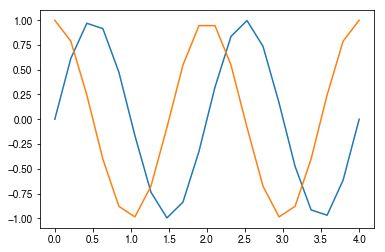

In [4]:
x = np.linspace(0, 4*np.pi, 20)
y = np.sin(x)
z = np.cos(x)
plt.plot(x/np.pi, y)
plt.plot(x/np.pi, z)
plt.show()

Let's customize that a little:

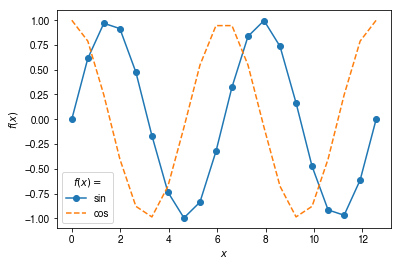

In [5]:
plt.plot(x, y, 'o-', label='sin')
plt.plot(x, z, '--', label='cos')
# LaTeX math is rendered
plt.legend(title=r'$f(x)=$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# Load and process with Numpy, then plot with Matplotlib

In [6]:
def get_x_y_z_rho(fpath):
    """Given a space separated file path with 4 columns: x, y, z, and rho,
    where x changes the fastest, then y, then z, return 1d arrays for
    x, y, and z, and a 3d array for rho
    """
    x, y, z, rho = np.loadtxt(fpath).T
    x, y, z = np.unique(x), np.unique(y), np.unique(z)
    nx, ny, nz = len(x), len(y), len(z)
    rho = rho.reshape((nz, ny, nx)).T
    return x, y, z, rho

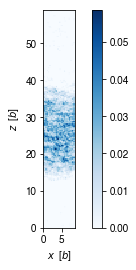

In [7]:
fpath = 'data/N-020_Rp-1.0_C-05.0_a-0.2_eps-00.0/avg_rhop.dat'
x, y, z, rho = get_x_y_z_rho(fpath)
# Average over y dimension and plot x-z heatmap
plt.pcolor(x, z, np.mean(rho, axis=1).T, cmap='Blues')
plt.xlabel(r'$x$  [$b$]')
plt.ylabel(r'$z$  [$b$]')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

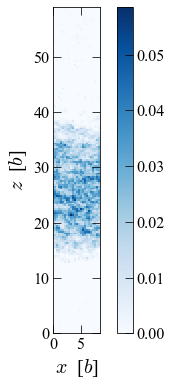

In [11]:
# To change pyplot style for remainder of notebook, use:
# plt.style.use('./my-custom-style.mplstyle')

# To change pyplot style locally, put plot code in with block, like:
with plt.style.context('./my-custom-style.mplstyle'):
    # Set a bigger figure
    fig = plt.figure(figsize=(6,6))
    plt.pcolor(x, z, np.mean(rho, axis=1).T, cmap='Blues')
    plt.xlabel(r'$x$  [$b$]')
    plt.ylabel(r'$z$  [$b$]')
    plt.colorbar()
    plt.gca().set_aspect('equal', adjustable='box')
    # Save to heatmap.png. Double click on the file to the left to 
    # open the png and view it in a separate tab
    plt.savefig('heatmap.png')
    # Display image below too
    plt.show()